# Probability Estimation and Ensembles

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, brier_score_loss, mean_squared_error, roc_auc_score, log_loss, accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<div align="justify">

Another import class of methods is *ensemble learning*, such as bagging or boosting, which are especially popular in machine learning due to their ability to improve accuracy of (point) predictions. 
Since such methods produce a (large) set of predictors $h_1, \ldots, h_M$ instead of a single hypothesis, it is tempting to produce probability estimates following basic frequentist principles. In the simplest case (of classification), each prediction $h_i(\vec{x})$ can be interpreted as a "vote" in favor of a class $y \in \mathcal{Y}$, and probabilities can be estimated by relative frequencies\,---\,needless to say, probabilities constructed in this way tend to be biased and are not necessarily well calibrated. Especially important in this field are tree-based methods such as random forests ({cite:t}`brei_rf01,krup_pe14`).  
<!-- \citep{brei_rf01,krup_pe14} -->

</div>

<div align="justify">

Obviously, while standard probability estimation is a viable approach to representing uncertainty in a prediction, 
there is no explicit distinction between different types of uncertainty. 
Methods falling into this category are mostly concerned with the aleatoric part of the overall uncertainty[^footNoteIdentifier].

</div>

[^footNoteIdentifier]: Yet, as will be seen later on, one way to go beyond mere aleatoric uncertainty is to combine the above methods, for example learning ensembles of probabilistic predictors. 
 <!-- (cf.\ Section \ref{sec:m1}) -->

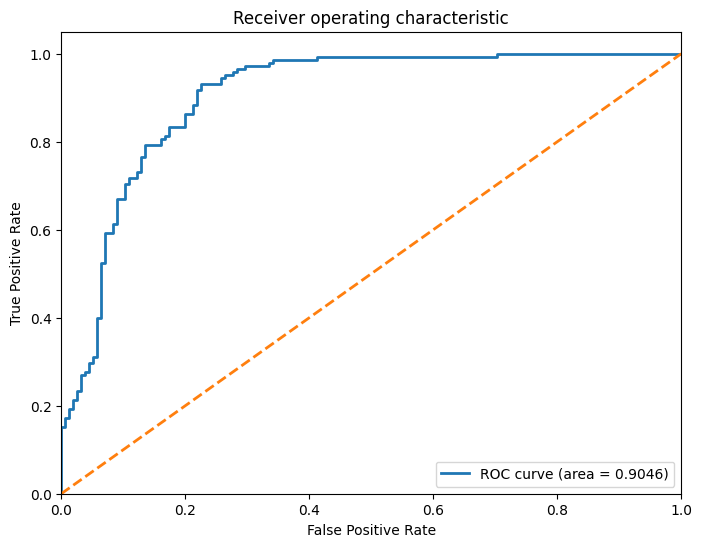

In [14]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)

y_test_bin = (y_test == 0).astype(int)
y_prob_bin = y_prob[:, 0]

fpr, tpr, _ = roc_curve(y_test_bin, y_prob_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--') # , color='black'
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Bagging

## AdaBoost

## Random Forest